# Evolutionary Game Theory

In the previous chapter, we considered the case of fitness being independant of the distribution of the whole population (the rates of increase of 1 type just depended on the quantity of that type). That was a specific case of Evolutionary game theory which considers **frequency dependent selection**.


---

## Frequency dependent selection

[Video](https://youtu.be/PFtwwrcouXY?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Consider. Let $x=(x_1, x_2)$ correspond to the population sizes of both types. The fitness functions are given by:

$$f_1(x)\qquad f_2(x)$$

As before we ensure a constant population size: $x_1 + x_2 = 1$. We have:

$$
\frac{dx_1}{dt}=x_1(f_1(x)-\phi) \qquad \frac{dx_2}{dt}=x_2(f_2(x)-\phi)
$$

we again have:


$$
\frac{dx_1}{dt} + \frac{dx_2}{dt}=x_1(f_1(x)-\phi) + x_2(f_2(x)-\phi)=0
$$


So $\phi=x_1f_1(x)+x_2f_2(x)$ (the average fitness).

We can substitute: $x_2=1-x_1$ to obtain:

$$
\frac{dx_1}{dt}=x_1(f_1(x)-x_1f_1(x)-x_2f_2(x))=x_1((1-x_1)f_1(x)-(1-x_1)f_2(x))
$$

$$
\frac{dx_1}{dt}=x_1(1-x_1)(f_1(x)-f_2(x))
$$

We see that we have 3 equilibria:

- $x_1=0$
- $x_2=1$
- Whatever distribution of $x$ that ensures: $f_1(x)=f_2(x)$


---

## Evolutionary Game Theory

Now we will consider potential differences of these equilibria. First we will return to considering Normal form games:

$$
A = 
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
$$

Evolutionary Game theory assigns strategies as types in a population, and indivividuals randomly encounter other individuals and play their corresponding strategy. The matrix $A$ correspods to the utility of a row player in a game where the row player is a given individual and the column player is the population.

This gives:

$$f_1=ax_1+bx_2\qquad f_2=cx_1+dx_2$$

or equivalently:

$$f=Ax\qquad \phi=fx$$

thus we have the same equation as before but in matrix notation:

$$\frac{dx}{dt}=x(f-\phi)$$

---

In this case, the 3 stable distributions correspond to:

- An entire population playing the first strategy;
- An entire population playing the second strategy;
- A population playing a mixture of first and second (such that there is indifference between the fitness).

---

We now consider the utility of a stable population in a **mutated** population.


---

## Mutated population

Given a strategy vector $x=(x_1, x_2)$, some $\epsilon>0$ and another strategy $y=(y_1, y_2)$, the post entry population $x_{\epsilon}$ is given by:

$$
x_{\epsilon} = (x_1 + \epsilon(y_1 - x_1), x_2 + \epsilon(y_2 - x_2))
$$



---

## Evolutionary Stable Strategies

[Video](https://youtu.be/lbzcToUM9ic?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Given a stable population distribution, $x$ it represents an **Evolutionary Stable Strategy** (ESS) if and only if there exists $\bar\epsilon>0$:

$$u(x, x_{\epsilon})>u(y, x_{\epsilon})\text{ for all }0<\epsilon<\bar\epsilon, y$$


where $u(x, y)$ corresponds to the fitness of strategy $x$ in population $y$ which is given by:

$$xAy^T$$

---

For the first type to be an ESS this corresponds to:

$$a(1-\epsilon)+b\epsilon > c(1-\epsilon) + d\epsilon$$

For small values of $\epsilon$ this corresponds to:

$$a>c$$

However if $a=c$, this corresponds to:

$$b>d$$

Thus the first strategy is an ESS (ie resists invasion) iff one of the two hold:

1. $a > c$
2. $a=c$ and $b > d$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

t = np.linspace(0, 10, 100)  # Obtain 100 time points

def dx(x, t, A):
    """
    Define the derivate of x.
    """
    f = np.dot(A, x)
    phi = np.dot(f, x)
    return x * (f - phi)

The case of $a>c$:

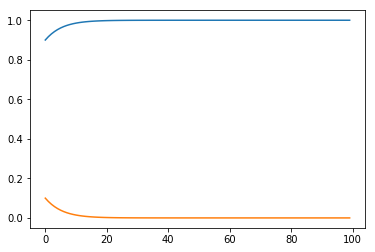

In [2]:
A = np.array([[4, 3], [2, 1]])
epsilon = 10 ** -1
xs = odeint(func=dx, y0=[1 - epsilon, epsilon], t=t, args=(A,))
plt.plot(xs);

The case of $a=c$ and $b>d$:

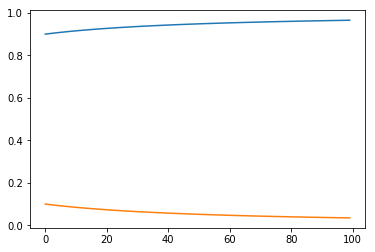

In [3]:
A = np.array([[4, 3], [4, 1]])
epsilon = 10 ** -1
xs = odeint(func=dx, y0=[1 - epsilon, epsilon], t=t, args=(A,))
plt.plot(xs);

$a=c$ and $b < d$:

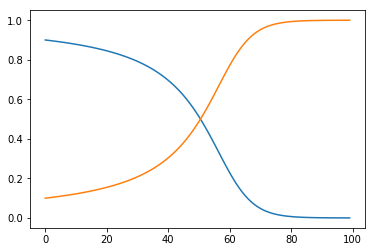

In [4]:
A = np.array([[4, 3], [4, 5]])
epsilon = 10 ** -1
xs = odeint(func=dx, y0=[1 - epsilon, epsilon], t=t, args=(A,))
plt.plot(xs);

$a < c$:

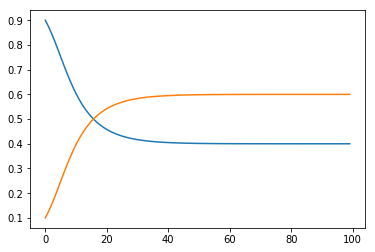

In [5]:
A = np.array([[1, 3], [4, 1]])
epsilon = 10 ** -1
xs = odeint(func=dx, y0=[1 - epsilon, epsilon], t=t, args=(A,))
plt.plot(xs);

We see in the above case that the population seems to stabilise at a mixed strategy. This leads to the general definition of the fitness of a mixed strategy: $x=(x_1, x_2)$:

$$u(x,x) = x_1f_1(x)+x_2f_2(x)$$

---

## General condition for ESS

[Video](https://youtu.be/zkhInay5xQc?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

If $x$ is an ESS, then for all $y\ne x$, either:

1. $u(x,x)>u(y,x)$
2. $u(x,x)=u(y,x)$ and $u(x,y)>u(y,y)$
---


Conversely, if either (1) or (2) holds for all $y\ne x$ then $x$ is an ESS.

---

### Proof

---

If $x$ is an ESS, then by definition:

$$u(x,x_{\epsilon})>u(y,x_{\epsilon})$$

which corresponds to:

$$(1-\epsilon)u(x,x)+\epsilon u(x,y)>(1-\epsilon)u(y,x)+\epsilon u(y,y)$$

- If condition 1 of the theorem holds then the above inequality can be satisfied for \\(\epsilon\\) sufficiently small. If condition 2 holds then the inequality is satisfied.
- Conversely:

    - If $u(x,x) < u(y,x)$ then we can find $\epsilon$ sufficiently small such that the inequality is violated.

    - If $u(x, x) = u(y,x)$ and $u(x,y) \leq u(y,y)$ then the inequality is violated.

This result gives us an efficient way of computing ESS. The first condition is in fact almost a condition for Nash Equilibrium (with a strict inequality), the second is thus a stronger condition that removes certain Nash equilibria from consideration. This becomes particularly relevant when considering Nash equilibrium in mixed strategies.

To find ESS in a pairwise context population game we:

1. Write down the associated two-player game $(A, A^T)\in{\mathbb{R}^{m\times n}}^2$;
2. Identify all symmetric Nash equilibria of the game;
3. Test the Nash equilibrium against the two conditions of the above Theorem.

Let us apply it to the one example that seemed to stabilise at a mixed strategy:

$$
A =\begin{pmatrix}
1 & 3\\
4 & 1
\end{pmatrix}
$$

In [6]:
import nashpy as nash
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

[(array([ 1.,  0.]), array([ 0.,  1.])),
 (array([ 0.,  1.]), array([ 1.,  0.])),
 (array([ 0.4,  0.6]), array([ 0.4,  0.6]))]

Looking at $x=(.4, .6)$ (which is the only symmetric nash equilibrium), we have

$$u(x, x)=u(y, x)$$

and (recall $y_1 + y_2 = 1$):

$$
u(x, y)=2.8y_1 + 1.8y_2=2.8y_1 + 1.8(1-y_1)=y_1+1.8
$$

\begin{align}
u(y, y)&=y_1^2+3y_1y_2+4y_1y_2+y_2^2\\
       &=y_1^2+7y_1-7y_1^2+1 - 2y_1 + y_1^2\\
       &=5y_1-5y_1^2+1
\end{align}

Thus:

$$u(x, y) - u(y, y) = -4y_1+5y_1^2+.8 = 5(y_1 - .4)^2$$

however $y_1\ne.4$ thus $x=(.4, .6)$ is an ESS.

Here is some code to verify the above calculations:

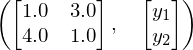

In [7]:
import sympy as sym
sym.init_printing()
A = sym.Matrix(A)
y_1, y_2 = sym.symbols("y_1, y_2")
y = sym.Matrix([y_1, y_2])
A, y

In [8]:
rhs = sym.expand((y.transpose() * A * y)[0].subs({y_2: 1 - y_1}))
rhs

In [9]:
lhs = sym.expand((sym.Matrix([[.4, .6]]) * A * y)[0].subs({y_2: 1-y_1}))
lhs

In [10]:
sym.factor(lhs - rhs)